In [30]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(color_codes=True)

In [12]:
df = pd.read_csv("Churn_Modelling.csv")

In [13]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [16]:
df.select_dtypes(include='object')

,Surname,Geography,Gender
0,Hargrave,France,Female
1,Hill,Spain,Female
2,Onio,France,Female
3,Boni,France,Female
4,Mitchell,Spain,Female
...,...,...,...
9995,Obijiaku,France,Male
9996,Johnstone,France,Male
9997,Liu,France,Female
9998,Sabbatini,Germany,Male


In [21]:
df.drop(columns = "Surname", inplace = True)

KeyError: "['Surname'] not found in axis"

In [22]:
df.drop(columns="RowNumber", inplace=True)

In [23]:
df.head(10)

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,15574012,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,15592531,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,15656148,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,15792365,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,15592389,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [24]:
cat_var=['Geography','Gender','NumOfProducts','HasCrCard','IsActiveMember']

<function matplotlib.pyplot.show(close=None, block=None)>

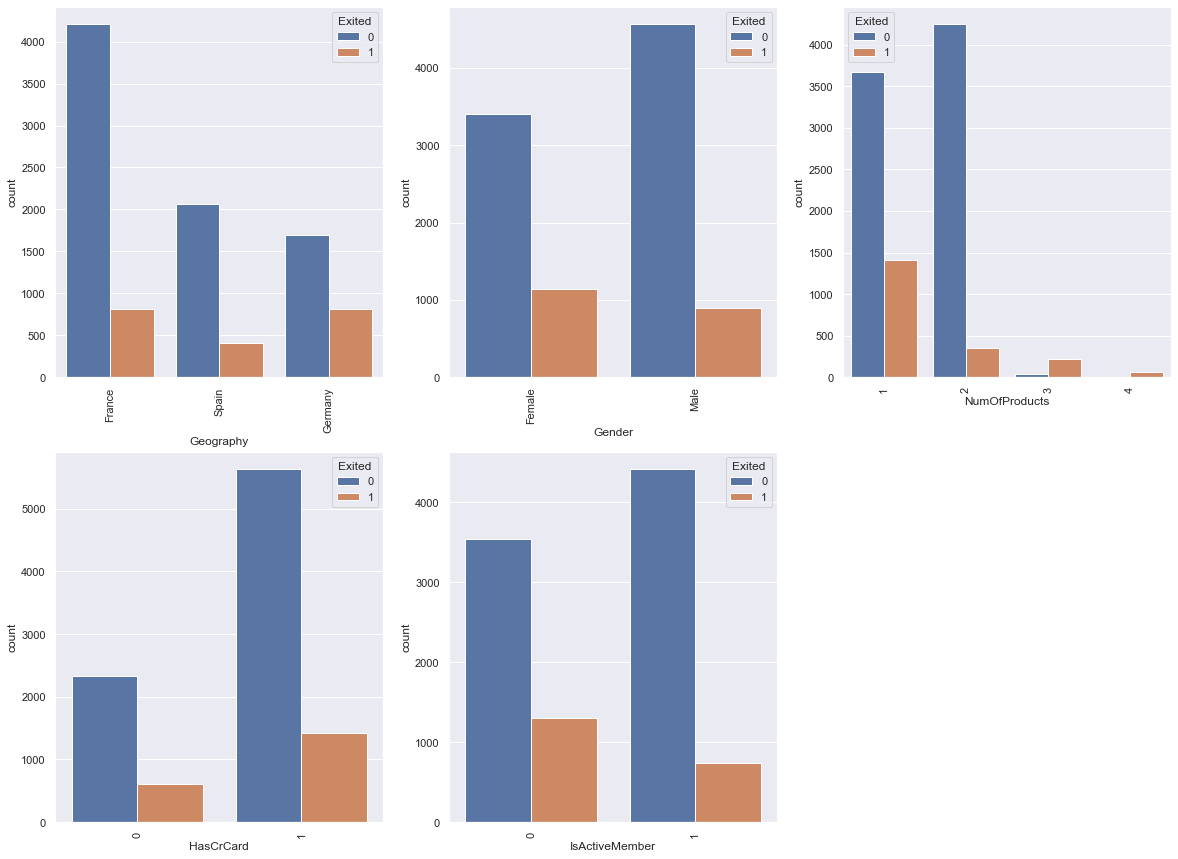

In [32]:
fig,axs=plt.subplots(nrows=2,ncols=3, figsize =(20,15))
axs=axs.flatten()

for i, var in enumerate(cat_var):
    sns.countplot(x=var,hue='Exited',data=df, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation = 90)
    
fig.tight_layout

fig.delaxes(axs[5])

plt.show

AttributeError: 'numpy.ndarray' object has no attribute 'xaxis'

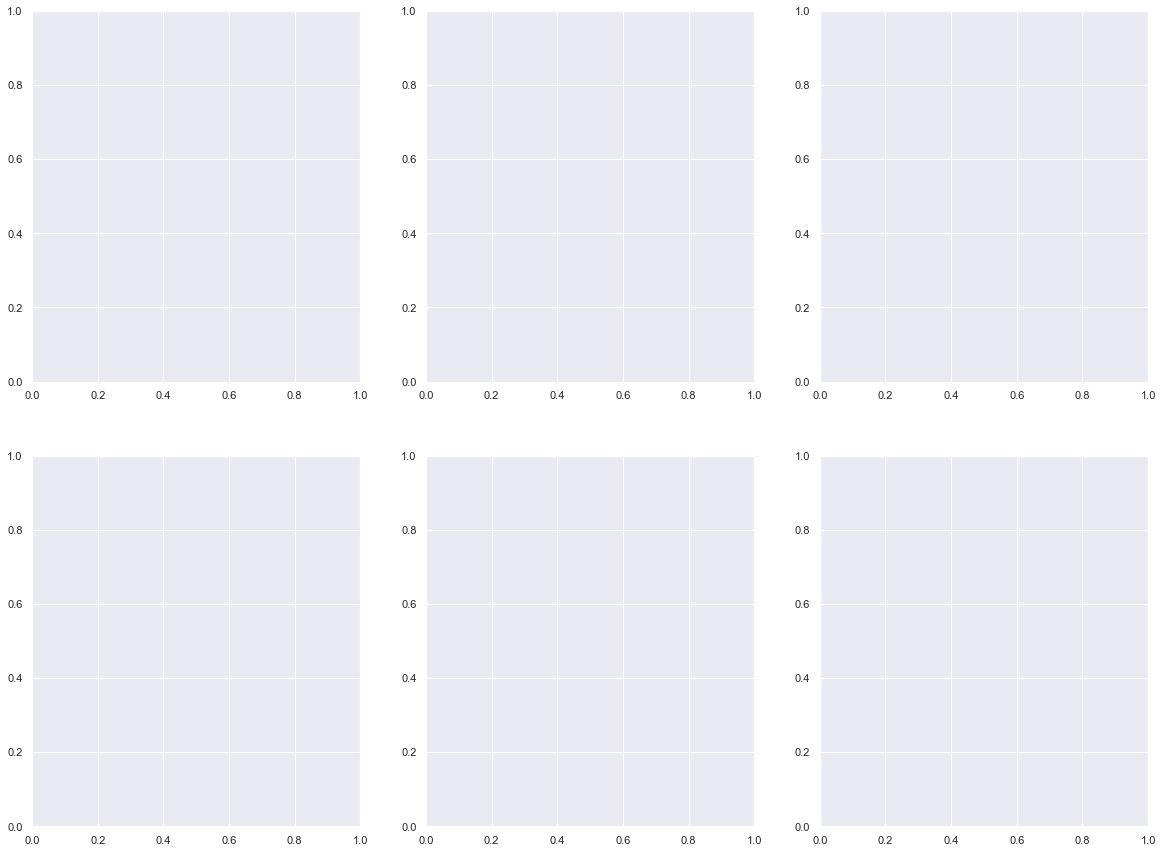

In [38]:
import warnings
warnings.filterwarnings("ignore")

cat_var=['Geography','Gender','NumOfProducts','HasCrCard','IsActiveMember']


fig, axs = plt.subplots(nrows=2 ,ncols=3, figsize=(20,15))
axs.flatten()

for i, var in enumerate(cat_var):
    sns.histplot(x=var, hue='Exited',data=df,ax=axs[i],multiple="fill")
    axs[i].set_xticklabels(df[var].unique(),rotation=90)
    axs[i].set_xlabel(var)
    
    
fig.tight_layout

fig.delaxes(axs[5])

plt.show
    

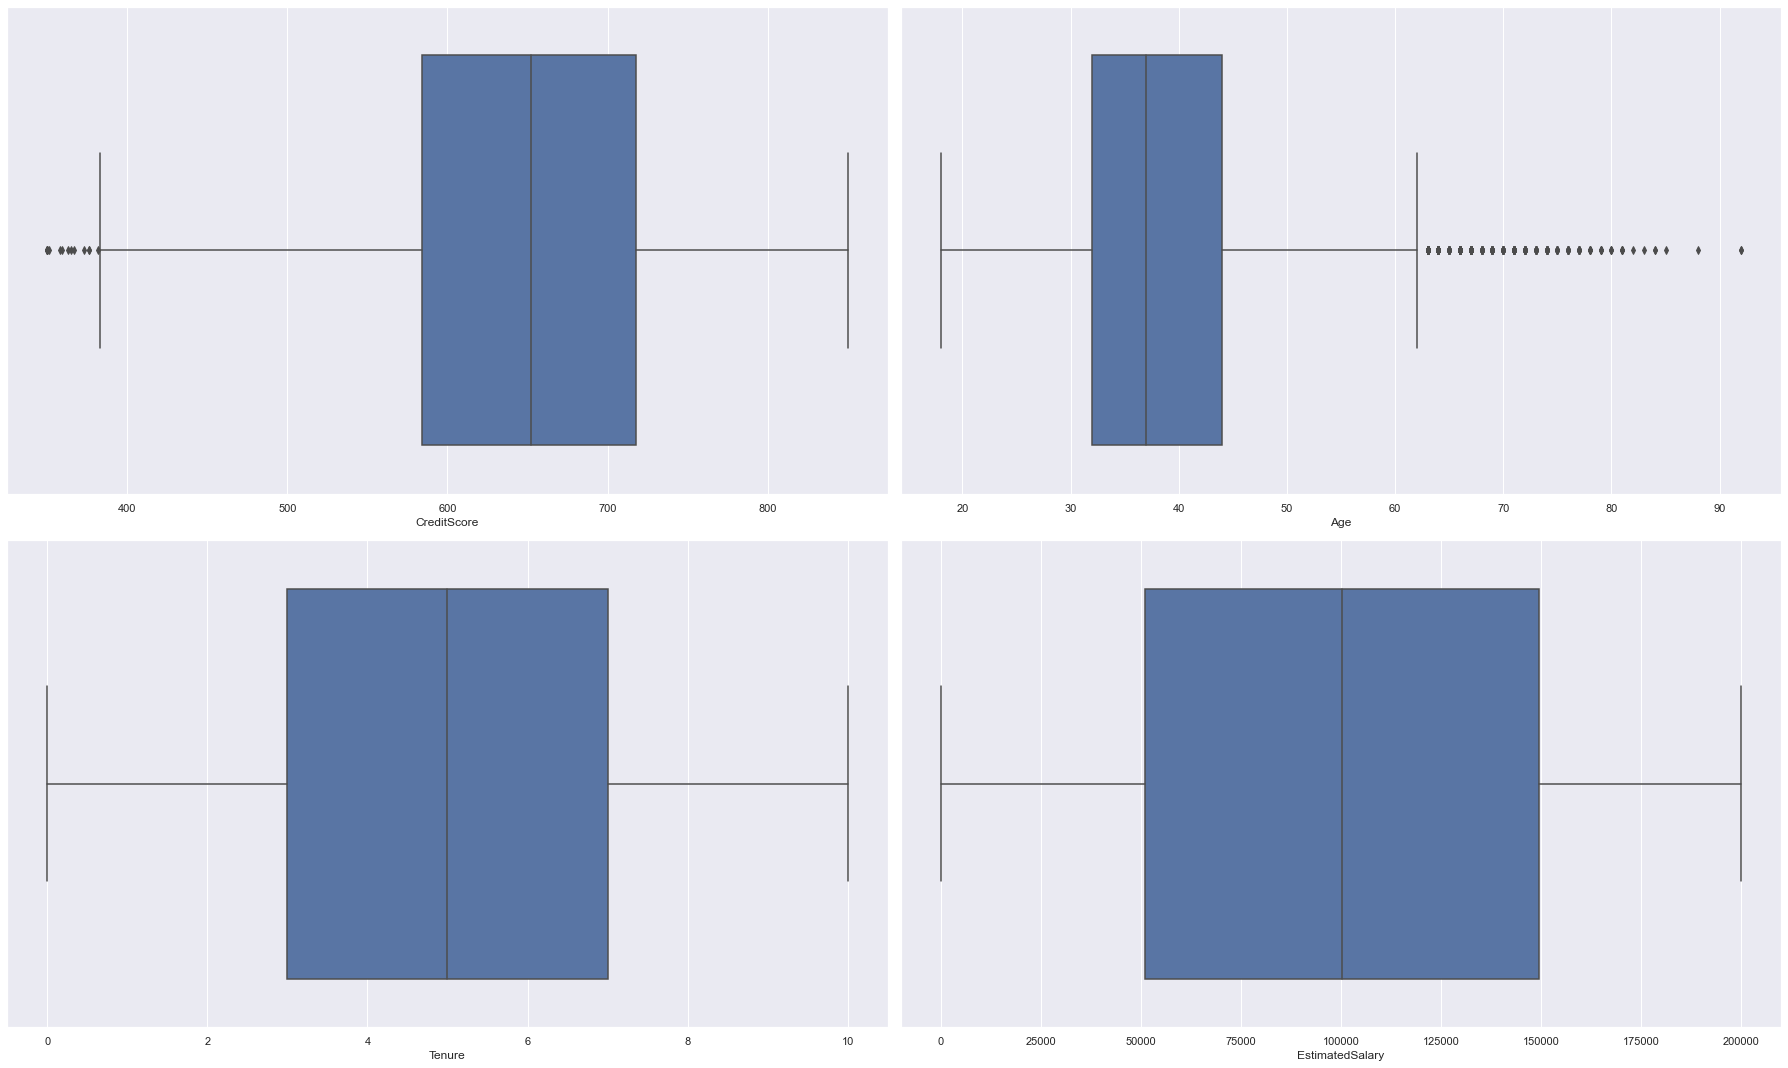

In [42]:
num_var=['CreditScore','Age','Tenure','EstimatedSalary']

fig,axs=plt.subplots(nrows=2,ncols=2,figsize=(25,15))
axs=axs.flatten()

for i, var in enumerate(num_var):
    sns.boxplot(x=var,data=df,ax=axs[i])
    
fig.tight_layout()

plt.show()

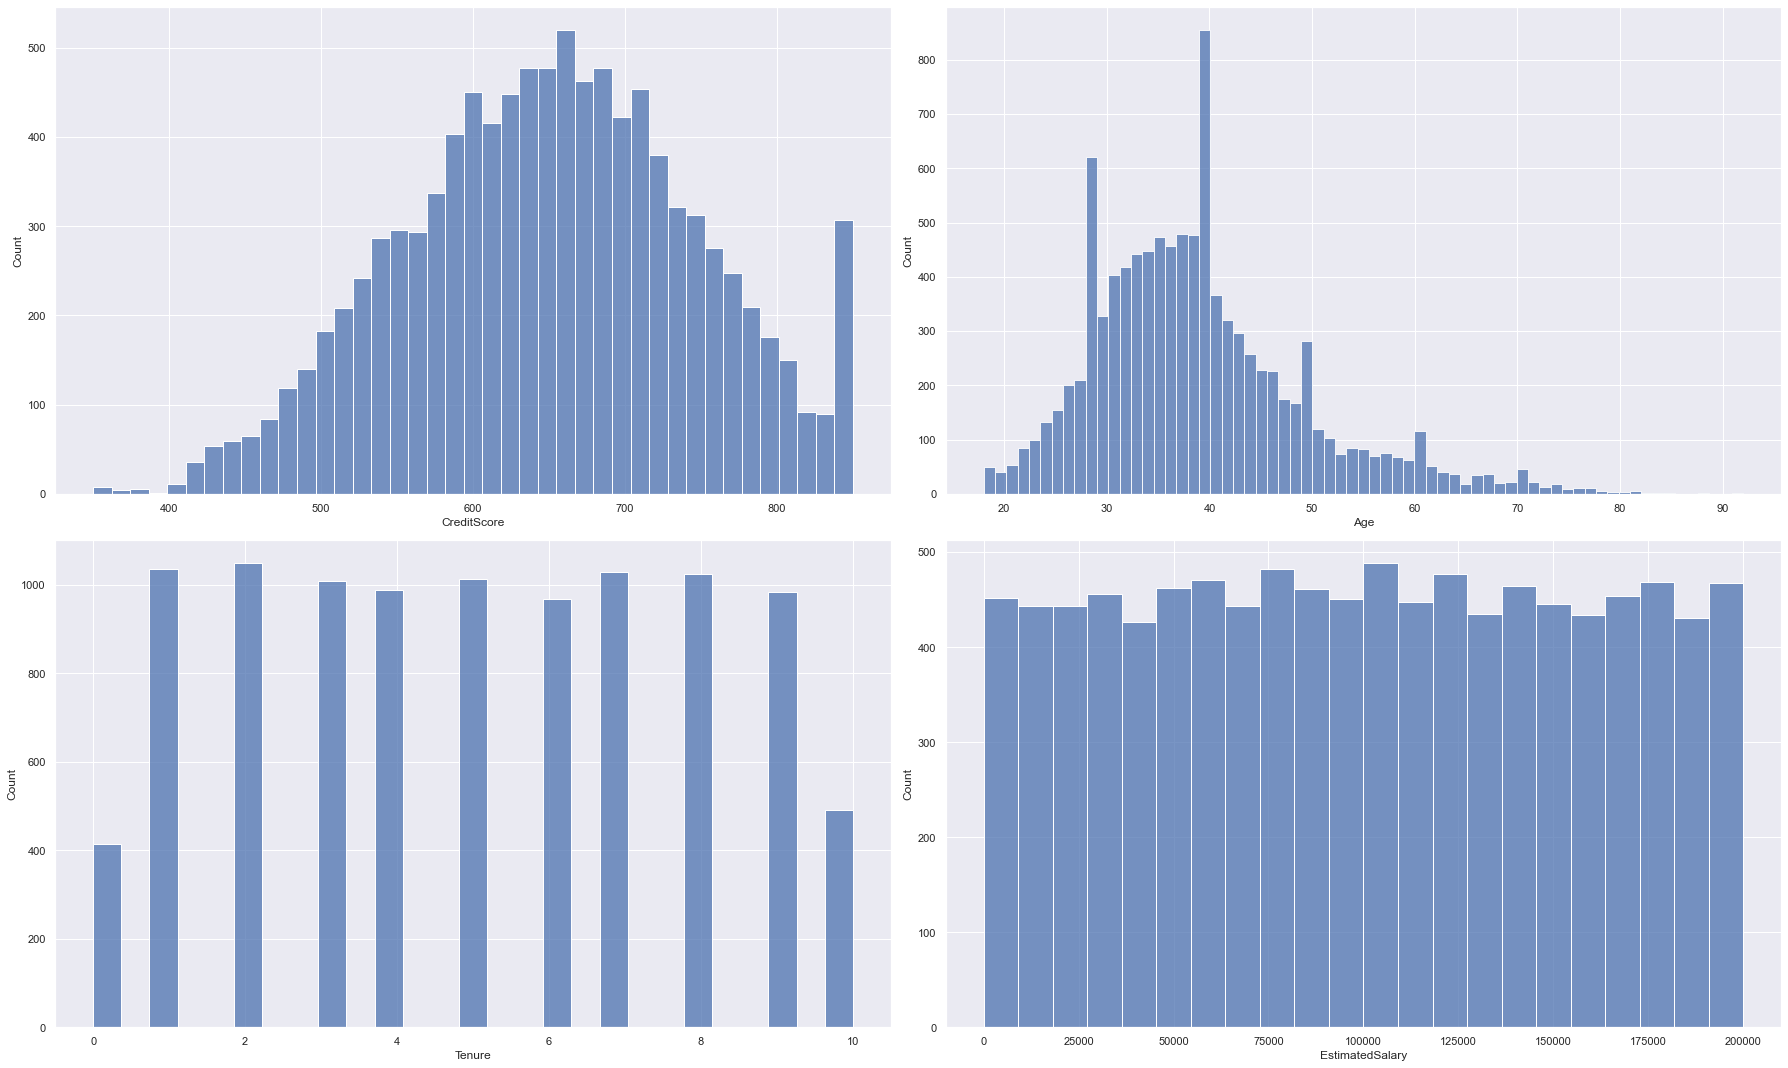

In [44]:
num_var=['CreditScore','Age','Tenure','EstimatedSalary']

fig,axs=plt.subplots(nrows=2,ncols=2,figsize=(25,15))
axs=axs.flatten()

for i, var in enumerate(num_var):
    sns.histplot(x=var,data=df,ax=axs[i])
    
fig.tight_layout()

plt.show()

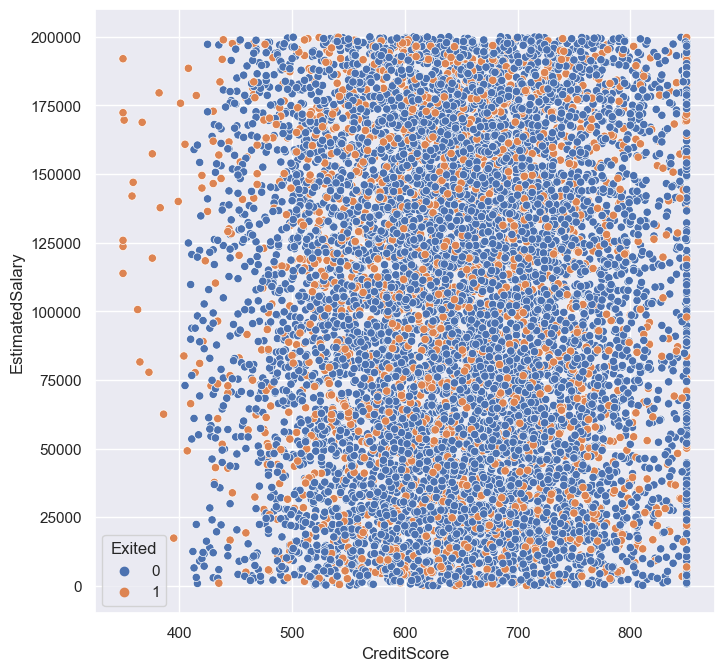

In [58]:
plt.figure(figsize=(8,8),dpi=100)
sns.scatterplot(x="CreditScore",y="EstimatedSalary",hue="Exited",data=df)
plt.show()

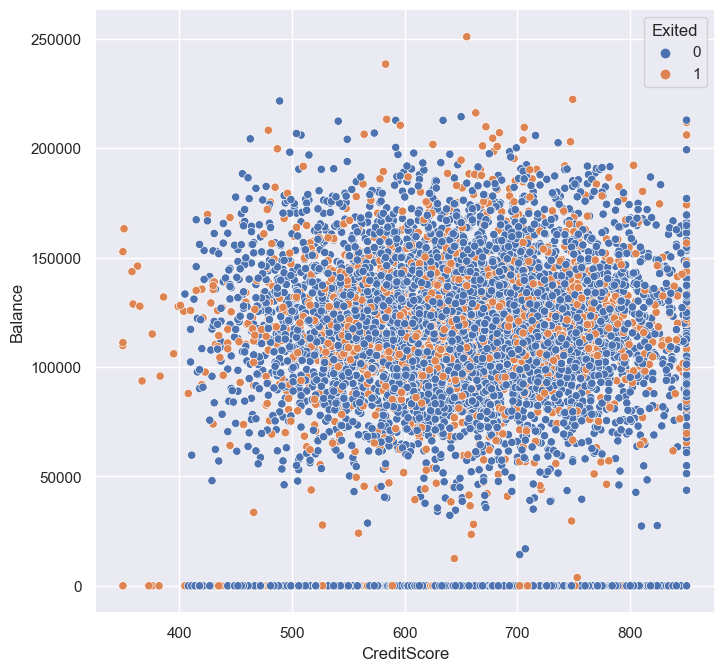

In [59]:
plt.figure(figsize=(8,8),dpi=100)
sns.scatterplot(x="CreditScore",y="Balance",hue="Exited",data=df)
plt.show()

In [92]:
!pip install scikit-learn


[notice] A new release of pip available: 22.2.2 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
##########  DATA PRE-PROCESSING

In [66]:
check_missing=df.isnull().sum()
check_missing

CustomerId         0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [67]:
df.head(10)

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,15574012,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,15592531,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,15656148,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,15792365,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,15592389,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [71]:
df.drop(columns='CustomerId',inplace =True)
df.head(10)

KeyError: "['CustomerId'] not found in axis"

In [72]:
for col in df.select_dtypes(include=['object']).columns:
    print(f"{col}: {df[col].unique()}")

Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']


In [75]:
from sklearn import preprocessing

for col in df.select_dtypes(include=['object']).columns:
    
    label_encoder=preprocessing.LabelEncoder()
    
    label_encoder.fit(df[col].unique())
    
    df[col] = label_encoder.transform(df[col])
    
    print(f"{col}: {df[col].unique()}")

Geography: [0 2 1]
Gender: [0 1]


In [ ]:
########REMOVE OUTLIER USING Z-SCORE

In [77]:
df.shape

(10000, 11)

In [78]:
from scipy import stats

def remove_out(df,cols,threshold = 3):
    
    for col in cols:
        
        z=np.abs(stats.zscore(df[col]))
        
        df=df[(z<threshold)| (df[col].isnull())]
    return df

In [79]:
sel_col=['Age']
df_clean = remove_out(df,sel_col)
df_clean.shape

(9867, 11)

In [ ]:
###  TRAIN TEST SPLIT

In [81]:
X = df_clean.drop('Exited', axis=1)
y = df_clean['Exited']

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train,X_test,y_train,y_test  = train_test_split(X,y,test_size=0.2,random_state=0)


In [ ]:
############ DECISION TREE

In [86]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dtree = DecisionTreeClassifier(class_weight='balanced')
param_grid={
    'max_depth': [3,4,5,6,7,8],
    'min_samples_split' : [2,3,4],
    'min_samples_leaf': [1,2,3,4],
    'random_state' : [0,42]
}

grid_search = GridSearchCV(dtree,param_grid, cv=5)
grid_search.fit(X_train,y_train)

print(grid_search.best_params_)

{'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'random_state': 0}


In [87]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0,max_depth=5,min_samples_leaf=2,min_samples_split=2)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=2, random_state=0)

In [88]:
y_pred=dtree.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test,y_pred)*100,2),"%")


Accuracy Score : 83.64 %


In [93]:
from sklearn.metrics import accuracy_score, f1_score, precision_score,recall_score,jaccard_score,log_loss
print('F-1 Score : ',(f1_score(y_test,y_pred,average='micro')))
print('Precision Score : ',(precision_score(y_test,y_pred,average='micro')))
print('Recall Score : ',(recall_score(y_test,y_pred,average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test,y_pred,average='micro')))
print('Log Loss : ',(log_loss(y_test,y_pred)))

F-1 Score :  0.8363728470111449
Precision Score :  0.8363728470111449
Recall Score :  0.8363728470111449
Jaccard Score :  0.7187636047017849
Log Loss :  5.651500282187406


Text(0.5, 1.0, 'Accuracy Score for Decision Tree:0.8363728470111449')

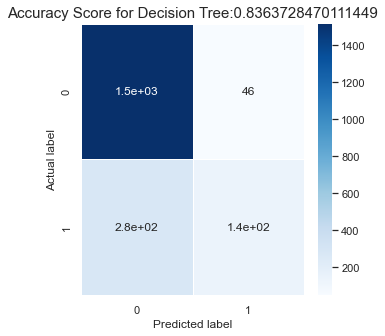

In [99]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,cmap='Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title='Accuracy Score for Decision Tree:{0}'.format(dtree.score(X_test,y_test))
plt.title(all_sample_title,size=15)

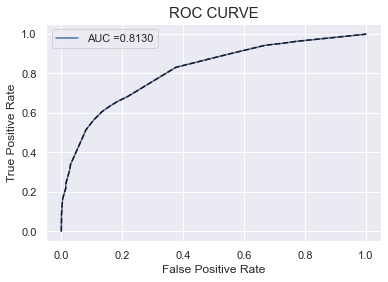

In [110]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = dtree.predict_proba(X_test)[:][:,1]
df_actual_predicted=pd.concat([pd.DataFrame(np.array(y_test),columns=['y_actual'])])
df_actual_predicted['y_predicted']= y_pred_proba
df_actual_predicted.index=y_test.index

fpr,tpr,tr=roc_curve(df_actual_predicted['y_actual'],df_actual_predicted['y_predicted'])
auc=roc_auc_score(df_actual_predicted['y_actual'],df_actual_predicted['y_predicted'])

plt.plot(fpr,tpr,label='AUC =%0.4f' %auc) 
plt.plot(fpr,tpr,linestyle='--', color='k')  
plt.xlabel('False Positive Rate')       
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE', size=15)
plt.legend()                     
                     
                     
                     